In [1]:
import numpy as np 
import scipy.io as io
import matplotlib.pyplot as plt 

In [2]:
#pwd

'd:\\ThisSemester\\CompNeuro\\Homeworks\\Hw2\\HW2_CAN_KOCAGIL\\Assignment'

In [3]:
#ls

 Volume in drive D is New Volume
 Volume Serial Number is 1C7D-3437

 Directory of d:\ThisSemester\CompNeuro\Homeworks\Hw2\HW2_CAN_KOCAGIL\Assignment

03.03.2021  14:13    <DIR>          .
03.03.2021  14:13    <DIR>          ..
02.03.2021  15:50             4.021 1.png
02.03.2021  15:50             4.045 10.png
02.03.2021  15:50             4.011 2.png
02.03.2021  15:50             4.009 3.png
02.03.2021  15:50             3.971 4.png
02.03.2021  15:50             3.950 5.png
02.03.2021  15:50             4.015 6.png
02.03.2021  15:50             3.957 7.png
02.03.2021  15:50             4.006 8.png
02.03.2021  15:50             3.966 9.png
25.02.2021  10:54         8.421.376 c2p3.mat
02.03.2021  15:44           250.886 comb_conv.png
02.03.2021  15:44           356.025 comb_conv_thres.png
02.03.2021  16:08           834.633 comb_thres.png
01.03.2021  18:10            46.228 comparisonhist.png
02.03.2021  00:27           237.217 CONV_image.png
01.03.2021  23:57            54.790 DoG2d.p

In [4]:
data = io.loadmat('c2p3.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'counts', 'stim'])


In [5]:
counts = data['counts']
stim = data['stim']

print(f"The shape of the counts data {counts.shape}")
print(f"The shape of the Stimilus data {stim.shape}")


The shape of the counts data (32767, 1)
The shape of the Stimilus data (16, 16, 32767)


In [6]:
def STA(stim:np.ndarray,rho:np.ndarray,num_timesteps:int) -> np.ndarray:
    """
        Given the stimilus, rho (spike train) and number of time steps, computes 
        Spike-Triggered-Average (STA). The spike-triggered average (STA) is a measure to relate a                     continuous signal and a simultaneously recorded spike train. It represents the average  signal  taken         at the times of spike occurrences and with proper normalization is equivalent to the   cross-correlation between the continuous signal and the spike  -train. The STA provides an estimate of a neuron's linear receptive field.


            Arguments:
                - stim (np.ndarray)   : Stimulus data to be subjected
                - rho  (np.ndarray)   : Time-series Spike-train data 
                - num_timesteps (int) : Number of timesteps before spike

            Returns:
                - _STA (np.ndarray)    : Averaged Stimulis data taken at spike occurrences



    """

    # Creating zero matrix for STA:
    stim_h,stim_w = stim.shape[:2]
    _STA = np.zeros((stim_h,stim_w,num_timesteps))

    # Finding spike times + num_timesteps
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps


    print(f'There are {len(spike_times)} of spikes.')

    for idx_spike in spike_times:
        _STA += stim[:,:,idx_spike - num_timesteps:idx_spike]

    _STA = _STA.astype(np.float)
    _STA /= len(spike_times)

    return _STA

There are 12956 of spikes.
<ipython-input-6-a47e413196d8>:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  _STA = _STA.astype(np.float)


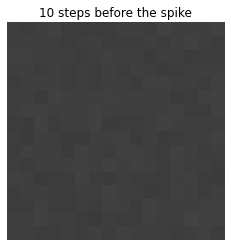

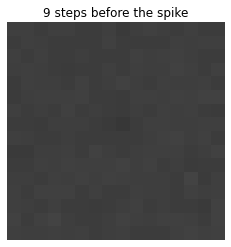

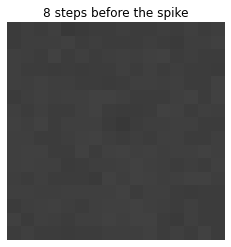

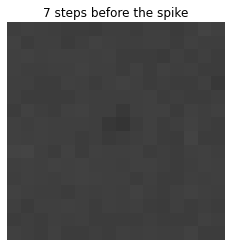

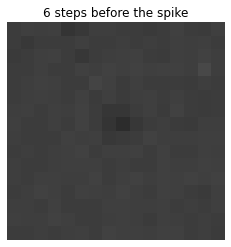

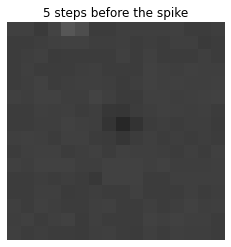

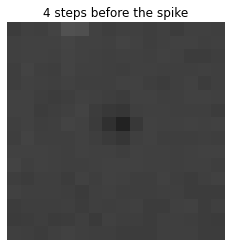

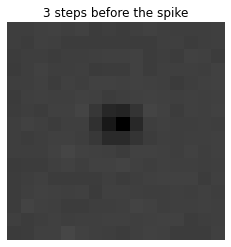

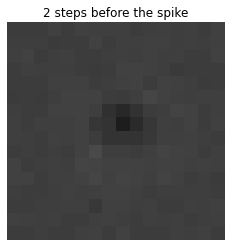

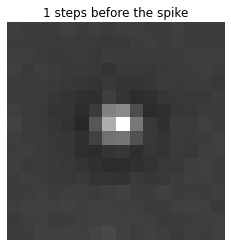

In [7]:
num_timesteps = 10
sta = STA(stim,counts,num_timesteps)

kwargs = dict(
    cmap = 'gray',
    vmin = sta.min(),
    vmax = sta.max()      
)


for i in np.arange(num_timesteps):
    plt.figure()
    plt.imshow(sta[:,:,i],**kwargs)
    plt.title(f"{num_timesteps - i} steps before the spike")
    plt.axis('off')
    plt.savefig(f"{num_timesteps - i}.png")
    


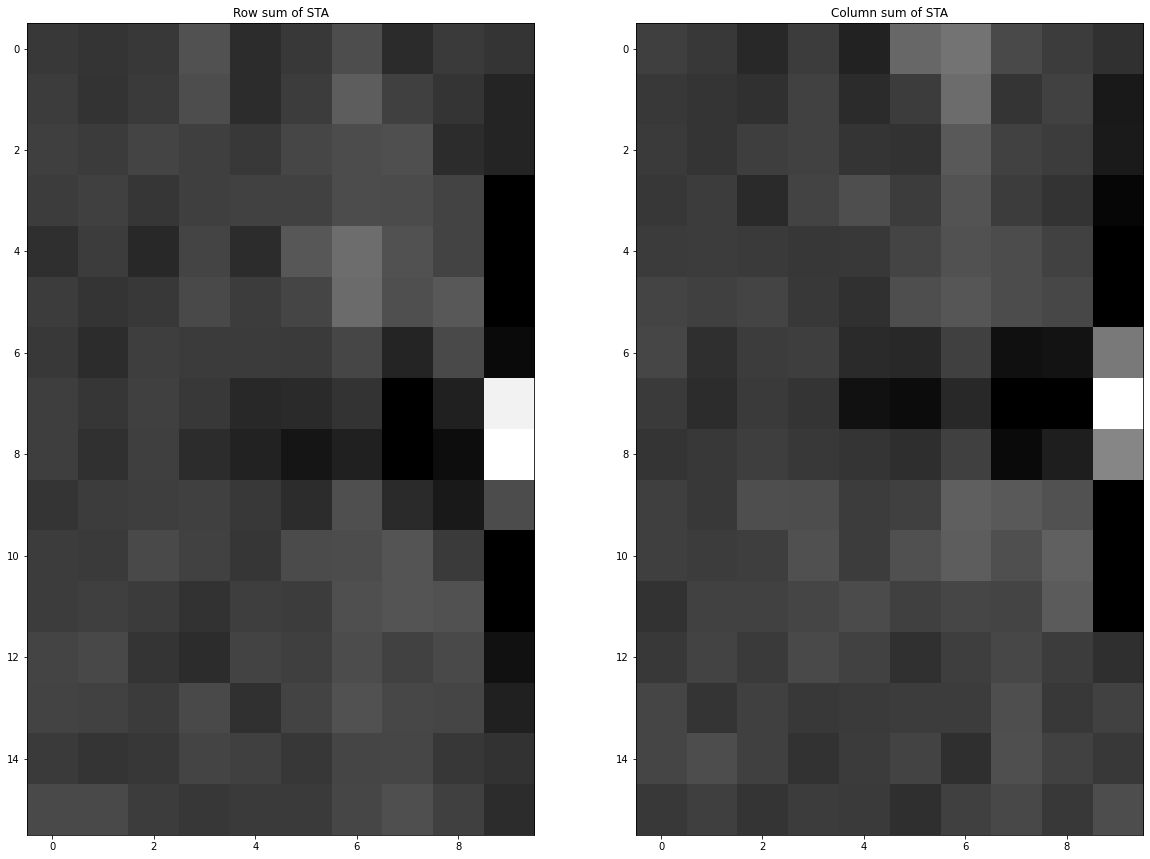

<Figure size 432x288 with 0 Axes>

In [8]:
fig,axs = plt.subplots(1,2,figsize = (20,40)) 
axs[0].imshow(np.sum(sta,axis = 0),**kwargs)
axs[0].set_title(f"Row sum of STA")
axs[1].imshow(np.sum(sta,axis = 1),**kwargs)
axs[1].set_title(f"Column sum of STA")


plt.show()
plt.savefig('SpatialDimensionSummationofSTANew' + '.png')

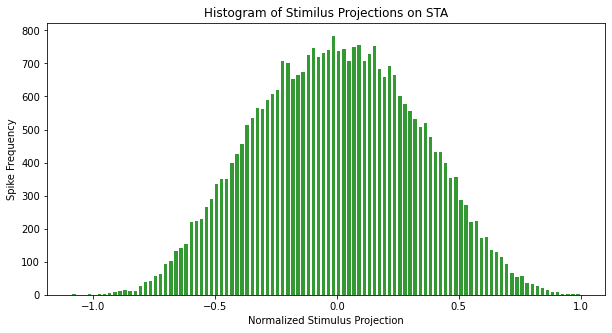

<Figure size 432x288 with 0 Axes>

In [9]:
project_stim = np.array([np.sum(sta[:,:, num_timesteps - 1] * _stim) for _stim in np.swapaxes(stim,0,2)]) 
project_stim /= project_stim.max()
kwargs = dict(
    bins=100, 
    alpha=.8,
    rwidth=.66,
   
)
plt.figure(figsize=(10, 5))
plt.hist(project_stim,color='g', **kwargs)
plt.title('Histogram of Stimilus Projections on STA')
plt.ylabel('Spike Frequency')
plt.xlabel('Normalized Stimulus Projection')
plt.show()
plt.savefig('HistogramSTA.png')

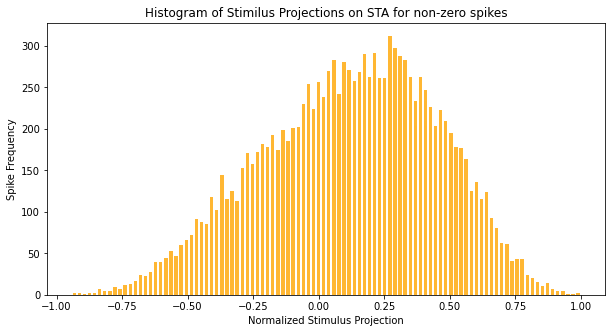

In [10]:
spike_times = counts.nonzero()[0]

project_stim_nonzero = np.array([np.sum(sta[:,:, num_timesteps - 1] * stim[:,:,i]) for i in spike_times]) 
project_stim_nonzero /= project_stim_nonzero.max()


plt.figure(figsize=(10, 5))
plt.hist(project_stim_nonzero, **kwargs,color='orange')
plt.title('Histogram of Stimilus Projections on STA for non-zero spikes')
plt.ylabel('Spike Frequency')
plt.xlabel('Normalized Stimulus Projection')
plt.show()

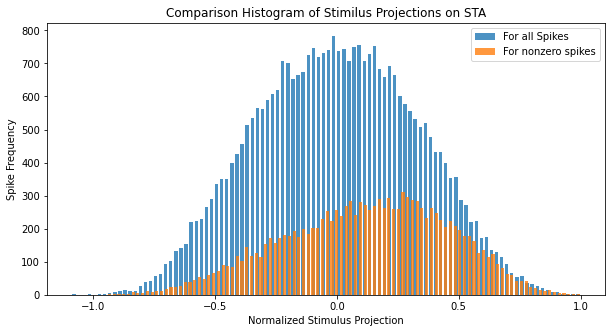

In [11]:

plt.figure(figsize=(10, 5))
plt.hist(project_stim, **kwargs)
plt.title('Comparison Histogram of Stimilus Projections on STA')
plt.hist(project_stim_nonzero, **kwargs)
plt.ylabel('Spike Frequency')
plt.xlabel('Normalized Stimulus Projection')
plt.legend(['For all Spikes','For nonzero spikes'])
plt.show()

In [12]:
def DoG_Receptive_Field(std_c:int,std_s:int,size:int) -> np.ndarray:
    """
        Construct an on-center dierence-of-gaussians (DoG) center-surround receptive field
        centered at 0 with the given size. Generally, the Difference of Gaussian module is a             filter that  identifies edges.Additionally, DoG is a feature enhancement algorithm that          involves the subtraction of one Gaussian blurred version of an original image from               another, less blurred version of the original


            Arguments:
                - std_c (int) : Standard deviation of lower sigma
                - std_s (int) : Standard deviation of higher sigma
                - size  (int) : Size of DoG kernel

            Returns:
               - DoG_kernel (np.ndarray) : DoG kernel with given (size,size)

    """


    import math

    # Computing lower sigma kernel:
    low_sigma_kernel  = np.fromfunction(
        lambda x, y: (1/(2*math.pi*std_c**2)) * math.e ** ((-1*((x-(size-1)/2)** 2+(y-(size-1)/2)**2))/(2*std_c**2)), (size, size)        
        )

    # Computing higher sigma kernel:
    high_sigma_kernel = np.fromfunction(
        lambda x, y: (1/(2*math.pi*std_s**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*std_s**2)), (size, size)
        )

    # DoG kernel:
    DoG_kernel = low_sigma_kernel - high_sigma_kernel


    return DoG_kernel



In [13]:
DoG_kernel = DoG_Receptive_Field(**
dict(
    size = 21,
    std_c = 2,
    std_s = 4

))

In [14]:
def plotFilter2D(kernel:np.ndarray,title:str,
                 cmap:str='coolwarm',
                 figsize:tuple = (10,10),
                 kwargs:dict = None) -> None:

    """
        Given the kernel, plot the kernel in 2-D surface.

            Arguments:
                - kernel (np.ndarray) : Kernel to be plotted
                - title  (str)        : Title of the figure
                - cmap   (str)        : Texture of the figure
                - figsize (tuple)     : Figure size
                - kwargs (dict)       : Additional orguments to plot if exists

            Returns:
                - None



    """

    plt.figure(figsize = figsize)

    if kwargs is not None:
        plt.imshow(kernel,cmap=cmap,**kwargs)
    else:
        plt.imshow(kernel,cmap=cmap)       
    
    plt.title(title)
    plt.colorbar()
    plt.show()




def plotFilter3D(kernel:np.ndarray,title:str,
                 kernel_name:str, 
                 cmap:str='coolwarm',
                 figsize:tuple = (10,10),
                 kwargs:dict = None) -> None:

    """
        Given the kernel, plot the kernel in 2-D surface.

            Arguments:
                - kernel (np.ndarray) : Kernel to be plotted
                - title  (str)        : Title of the figure
                - kernel_name (str)   : The name of the filter/kernel
                - cmap   (str)        : Texture of the figure
                - figsize (tuple)     : Figure size
                - kwargs (dict)       : Additional orguments to plot if exists

            Returns:
                - None



    """

    fig_3D = plt.figure(figsize = (10,10))
    size = kernel.shape[0]
    ax_3D = plt.axes(projection='3d')
    x,y = np.meshgrid(
        np.arange( - int(size / 2), 1 + int(size / 2)),
        np.arange( - int(size / 2), 1 + int(size / 2))
                )
    
    
    if kwargs is not None:
        ax_3D.plot_surface(x, y, kernel,cmap = cmap, **kwargs)
    else:
        ax_3D.plot_surface(x, y,kernel, cmap = cmap)   
    
    ax_3D.set_xlabel('x')
    ax_3D.set_ylabel('y')
    ax_3D.set_zlabel(f'{kernel_name}(x, y)')
    plt.title(title)
    plt.show()




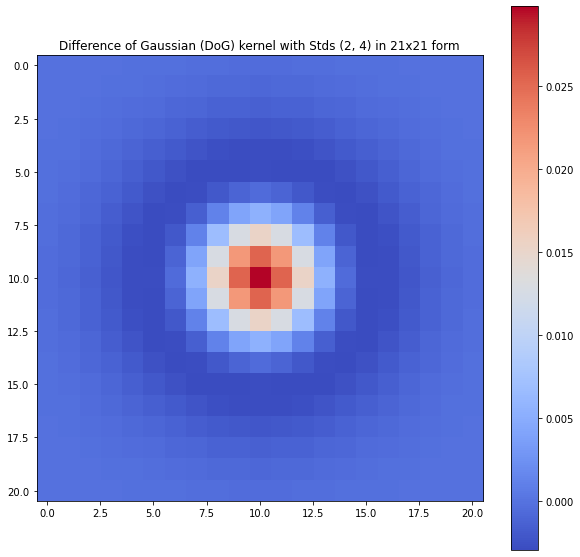

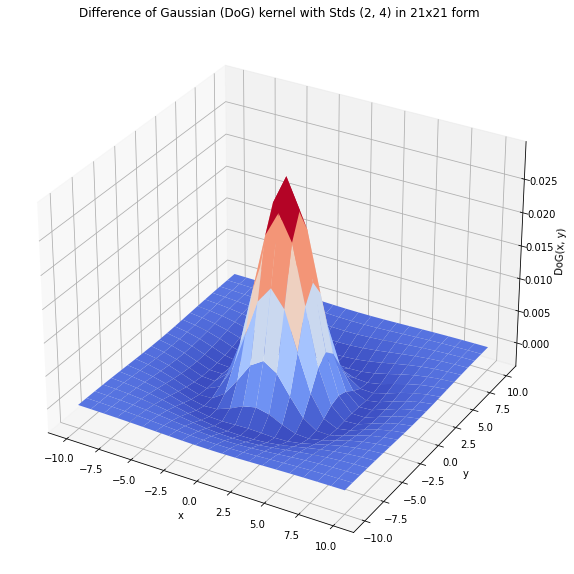

In [15]:
kwargs = dict(
    rstride=1,
    cstride=1,     
    edgecolor='none'
)


plotFilter2D(DoG_kernel,f'Difference of Gaussian (DoG) kernel with Stds {(2,4)} in 21x21 form')

plotFilter3D(DoG_kernel,f'Difference of Gaussian (DoG) kernel with Stds {(2,4)} in 21x21 form','DoG', kwargs = kwargs)


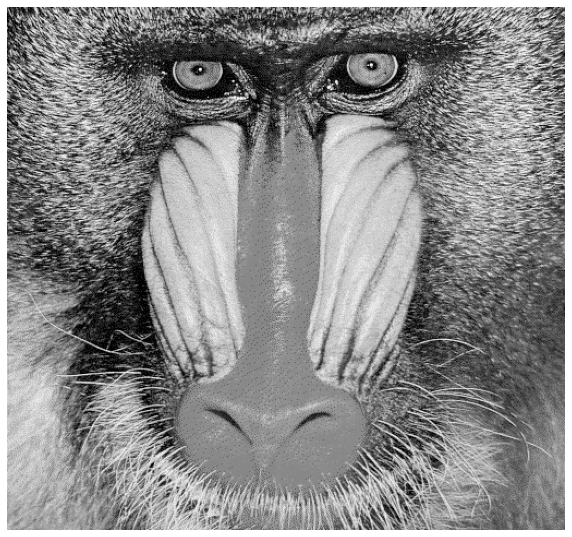

In [88]:
image = plt.imread('hw2_image.bmp')
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [89]:
class _Window(object):
  """
    This class creates a generator that slide over the given image with
    predefined step and window size.

      Attributes:
        - image      : input image to be sliding
        - step_size  : it determines how much slice the generator extract
        - dims       : resulting image's dimensions

      Methods:
        - __iter__   : creates a generator over the image with given patch dimensions

  """
  def __init__(self,image : np.ndarray, step_size:tuple, dims: tuple):
    """ 
      Creates an constructor for _Window class, this method encapsulates
      all necessary data to generate windows over image.  

    """
    self.image = image 
    self.dims = dims 
    self.step_size = step_size

  def __iter__(self):
    """ Generator function to window over image. """
    for x in range(self.dims[0]):
      for y in range(self.dims[1]):
        yield self.image[x:x + self.step_size[0], y:y + self.step_size[1]]


def Conv2D(source_image : np.ndarray, kernel: np.ndarray) -> np.ndarray:
  """
   Convolution is the process of adding each element of the image to its local neighbors,           weighted by the kernel. This is related to a form of mathematical convolution.
   
      Arguments:
        - source_image   (np.ndarray) : Gray scale image to be convolved
        - kernel         (np.ndarray) : Kernel to be sliding over the image

      Returns:
        - conv_image     (np.ndarray) : Resulting convolved image
  """

  assert (len(source_image.shape)   == 2), "Image is not gray scale" 
  assert (len(kernel.shape) == 2), "Kernel is not in required size"      
  
  source_image =  np.asarray(source_image).clip(0,255).copy()
  H,W = source_image.shape
  k_h,k_w = kernel.shape
  padded_image = np.pad(array = source_image, pad_width = max(k_w,k_w) // 2 + 1, mode = 'constant')

  new_H,new_W = padded_image.shape
  h_pad , w_pad  =  (new_H - H) , (new_W - W)

  # Creating sliding window:
  image_window = _Window(padded_image,(k_h,k_w),(new_H - h_pad, new_W - w_pad))

  #kernel = np.flipud(np.fliplr(kernel))
  # Main operation:
  conv_image = [(patch * kernel).sum() for patch in image_window]
  
  return np.array(conv_image).reshape(H,W)



def min_max_scaler(matrix : np.ndarray)-> np.ndarray :
  """
    Given the matrix, apply normalization as follow:

        norm_matrix = (matrix - min_val) / (max_val - min_val)

    Arguments:
      -  matrix     (np.ndarray) : Input Matrix

    Returns:
      - norm_matrix (np.ndarray) : Normalized version of matr

  """
  matrix = np.asarray(matrix).copy()
  max_val = matrix.max()
  min_val = matrix.min()

  return (matrix - min_val) / (max_val - min_val)

True


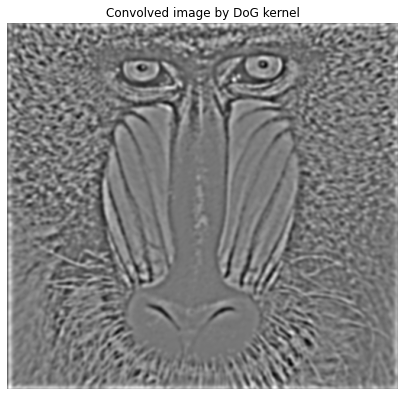

In [90]:
if (image[:,:,0] == image[:,:,1]).all() and \
   (image[:,:,0] == image[:,:,2]).all() and \
   (image[:,:,1] == image[:,:,2]).all():

   print('True')


gray_image = image[:,:,0]
filtered_image = Conv2D(gray_image,DoG_kernel)

plt.figure(figsize=(7,7))
plt.imshow(min_max_scaler(filtered_image),cmap = 'gray')
plt.title('Convolved image by DoG kernel')
plt.axis('off')
plt.show()

In [91]:
def otsu_threshold(source_image: np.ndarray) -> np.ndarray:
    """
    Otsu's automatic thresholding method that seperates background and
    foreground of image with automatically computed threshold value. This 
    threshold is computed via minimizing the within-class varicance or 
    maximing the inter-class variability that yields same results. However,
    note that computed threshold value by maximizing the inter-class variance
    is more computationally efficient method. 

      Arguments:
        - source_image (np.ndarray) : Source image to be thresholded by Otsu

      Returns:
        - thres_image  (np.ndarray) : Resulting image after applying Otsu's method
 

  """

    assert (len(source_image.shape) == 2), "Image is not gray scale"     
    
    source_image =  np.asarray(source_image).clip(0,255).copy()

    hist =  [np.sum(pixel == source_image) for pixel in np.arange(256)]

    
    otsu_thres = 0
    var = 0
    max_val = 256
    
    for thres in np.arange(256):

      # For first class, mean and variance:
      w_0 = sum(pixel for pixel in hist[:thres])
      mu_0 = sum([i * hist[i] for i in range(thres)]) / w_0 if w_0 > 0 else 0   

      # For second class, mean and variance:
      w_1 = sum(pixel for pixel in hist[thres:])          
      mu_1 = sum([j * hist[j] for j in range(thres, max_val)]) / w_1 if w_1 > 0 else 0

      # calculating inter-class variance         
      s = w_0 * w_1 * (mu_0 - mu_1) ** 2

      # Set threshold if new inter class variance is bigger than previous
      otsu_thres = thres - 1 if s > var else otsu_thres
      var = s if s > var else var

    print(f'Self written Otsu threshold value is {otsu_thres}')  

    # Apply thresholding: Hence
    source_image[source_image >= otsu_thres] = 255
    source_image[source_image < otsu_thres] = 0

    return source_image.astype(np.uint8)





In [92]:
def manuel_thresholding(source_image: np.ndarray,threshold:int) -> np.ndarray:
    """
        Given the source image and threshold, apply thresholding (i.e., setting all values
        above a certain threshold to 1 and the remainder to 0.

            Arguments:
                - source_image (np.ndarray) : Source image to be thresholded
                - threshold    (int)        : Threshold value

            Returns:   
                - thres_image  (np.ndarray) : Resulting image after applying threshold



    """

    
    assert (len(source_image.shape) == 2), "Image is not gray scale"     
    
    source_image =  np.asarray(source_image).clip(0,255).copy()



    # Apply thresholding:
    source_image[source_image >= threshold] = 255
    source_image[source_image < threshold] = 0

    return source_image.astype(np.uint8)

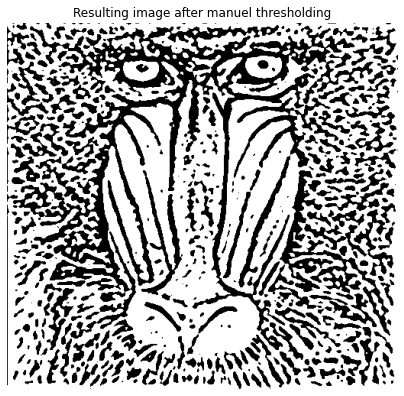

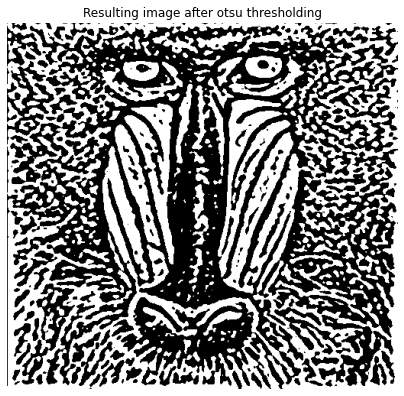

Self written Otsu threshold value is 168


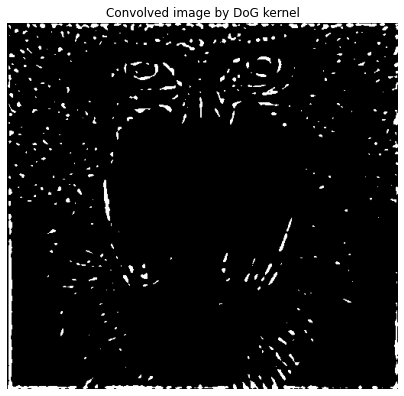

In [93]:
img = np.array(min_max_scaler(filtered_image) * 255, dtype = np.uint8)


plt.figure(figsize=(7,7))
plt.imshow(manuel_thresholding(img,115),cmap = 'gray')
plt.title('Resulting image after manuel thresholding')
plt.axis('off')
plt.show()


img = np.array(min_max_scaler(filtered_image) * 255, dtype = np.uint8)
plt.figure(figsize=(7,7))
import cv2
plt.imshow(cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1],cmap = 'gray')
plt.title('Resulting image after otsu thresholding')
plt.axis('off')
plt.show()



img = np.array(min_max_scaler(filtered_image) * 255, dtype = np.uint8)
plt.figure(figsize=(7,7))
plt.imshow(otsu_threshold(img),cmap = 'gray')
plt.title('Convolved image by DoG kernel')
plt.axis('off')
plt.show()

In [94]:
def Gabor_Receptive_Field(std_l:int,std_w:int,
                          theta:float,Lambda:int,
                          psi:int, size:tuple) -> np.ndarray:
    """
        Gabor Receptive Field is a linear filter used for texture analysis, which essentially             means that it analyzes whether there is any specific frequency content in the image in            specific directions in a localized region around the point or region of analysis


            Arguments:
                - std_l  (int)   : Standard deviation of lower sigma
                - std_w  (int)   : Standard deviation of higher sigma                
                - theta  (float) : Orientation
                - Lambda (int)   : Gabor filter parameter 
                - psi    (int)   : Gabor filter parameter
                - size   (tuple) : Size of Gabor kernel

            Returns:
               - Gabor_kernel (np.ndarray) : Gabor kernel with given (size,size)

    """


    import math

    x, y = np.meshgrid(np.arange(- int(size[0] / 2), 1 + int(size[0] / 2)),
                       np.arange(- int(size[1] / 2), 1 + int(size[1] / 2)))


    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    # Main function for creating Gabor filter:
    Gabor_kernel = np.exp(-.5 * (x_theta ** 2 / std_l ** 2 + y_theta ** 2 / std_w ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)


    return Gabor_kernel



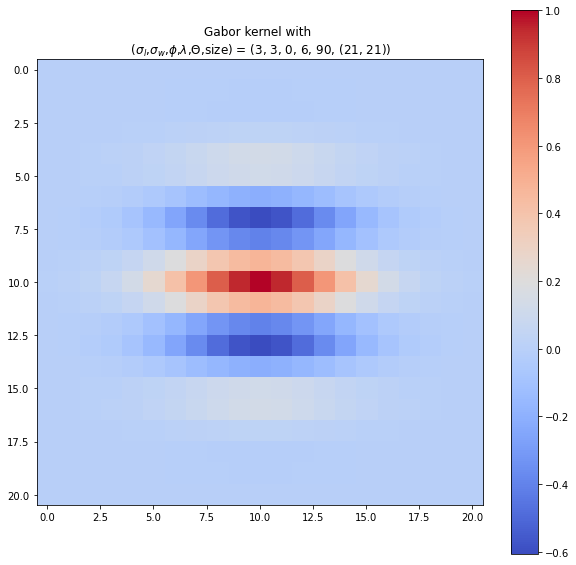

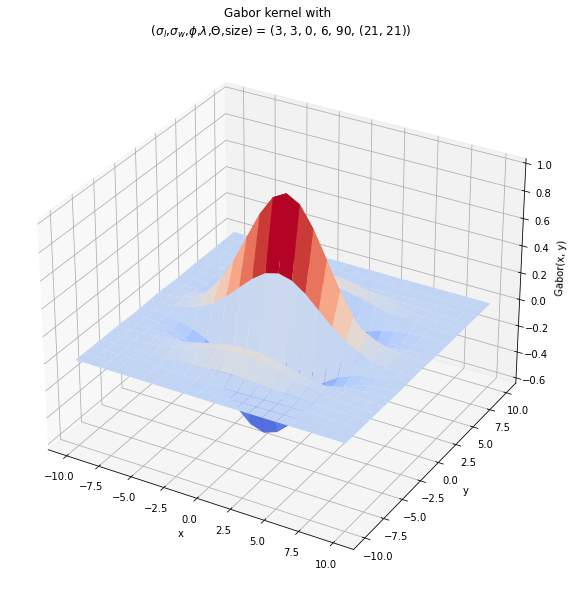

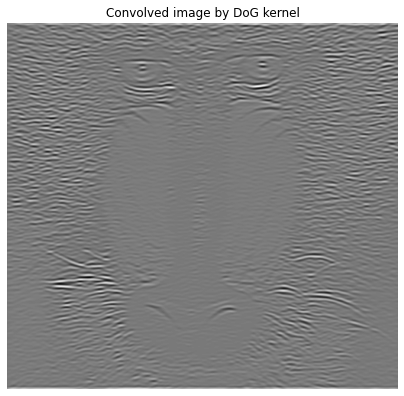

In [95]:
theta_90 = np.pi / 2
size = (21,21)
kwargs_kernel = dict(
        std_l = 3,
        std_w = 3,
        psi = 0,
        Lambda = 6,
        size = size
)

std_l = 3
std_w = 3
phi = 0
Lambda = 6
size = size

Gabor_90_kernel = Gabor_Receptive_Field(theta = theta_90,**kwargs_kernel)


kwargs = dict(
    rstride=1,
    cstride=1,     
    edgecolor='none'

)

plotFilter2D(Gabor_90_kernel,f'Gabor kernel with \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,90,size}'
)



plotFilter3D(Gabor_90_kernel,f'Gabor kernel with \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,90,size}',kernel_name = 'Gabor',kwargs=kwargs)


Gabor_result_1 = Conv2D(image[:,:,0],Gabor_90_kernel)

plt.figure(figsize=(7,7))
plt.imshow(min_max_scaler(Gabor_result_1),cmap = 'gray')
plt.title('Convolved image by DoG kernel')
plt.axis('off')
plt.show()

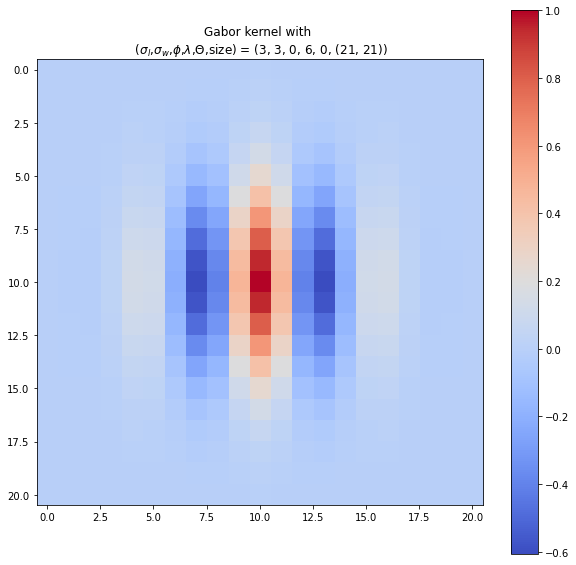

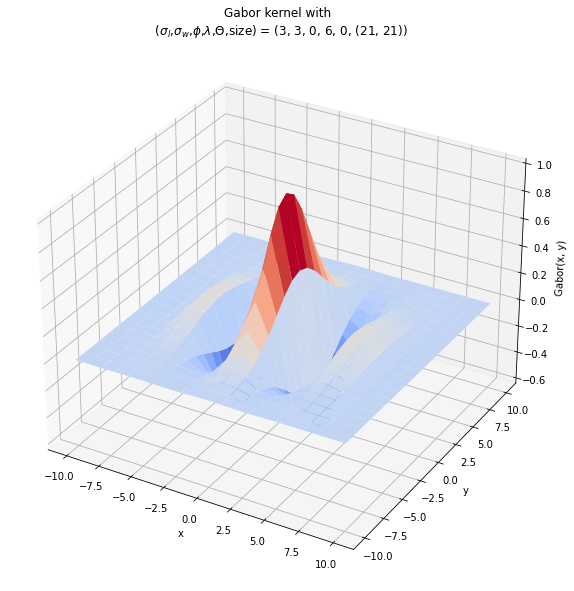

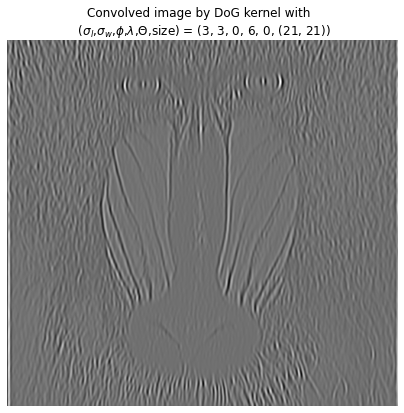

In [96]:
theta_0 = 0
Gabor_0_kernel = Gabor_Receptive_Field(theta  = theta_0, **kwargs_kernel)

plotFilter2D(Gabor_0_kernel,f'Gabor kernel with \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,theta_0,size}')

plotFilter3D(Gabor_0_kernel,f'Gabor kernel with \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,theta_0,size}',kernel_name = 'Gabor',kwargs=kwargs)


Gabor_result_2 = Conv2D(image[:,:,0],Gabor_0_kernel)


plt.figure(figsize=(7,7))
plt.imshow(min_max_scaler(Gabor_result_2),cmap = 'gray')
plt.title(f'Convolved image by DoG kernel with  \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,0,size}')
plt.axis('off')
plt.show()


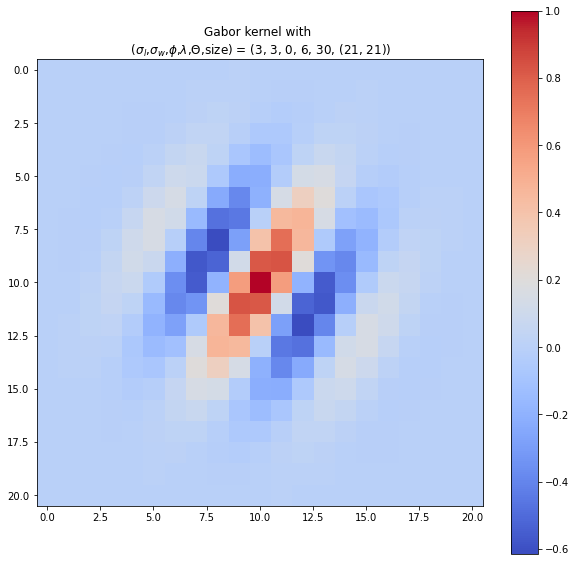

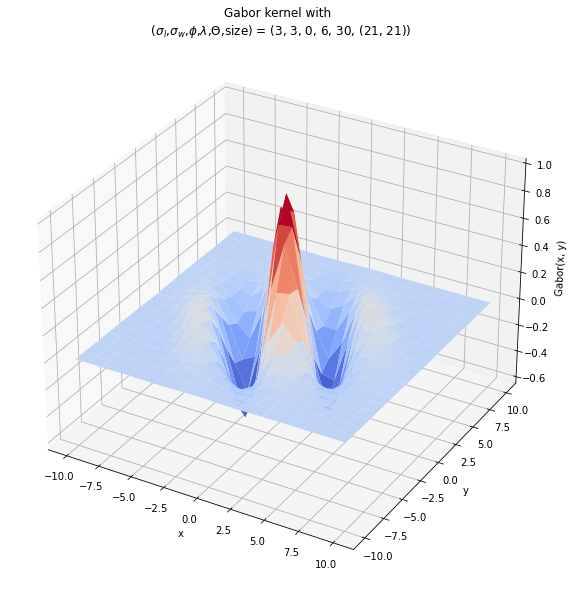

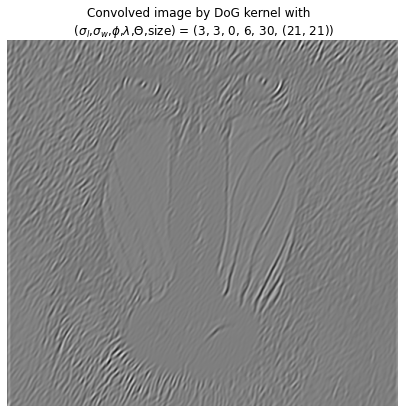

In [97]:
theta_30 = np.pi / 6

Gabor_30_kernel = Gabor_Receptive_Field(theta = theta_30,**kwargs_kernel)
plotFilter2D(Gabor_30_kernel,f'Gabor kernel with \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,30,size}')

plotFilter3D(Gabor_30_kernel,f'Gabor kernel with \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,30,size}',kernel_name = 'Gabor',kwargs=kwargs)


Gabor_result_3 = Conv2D(image[:,:,0],Gabor_30_kernel)


plt.figure(figsize=(7,7))
plt.imshow(min_max_scaler(Gabor_result_3),cmap = 'gray')
plt.title(f'Convolved image by DoG kernel with  \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,30,size}')
plt.axis('off')
plt.show()


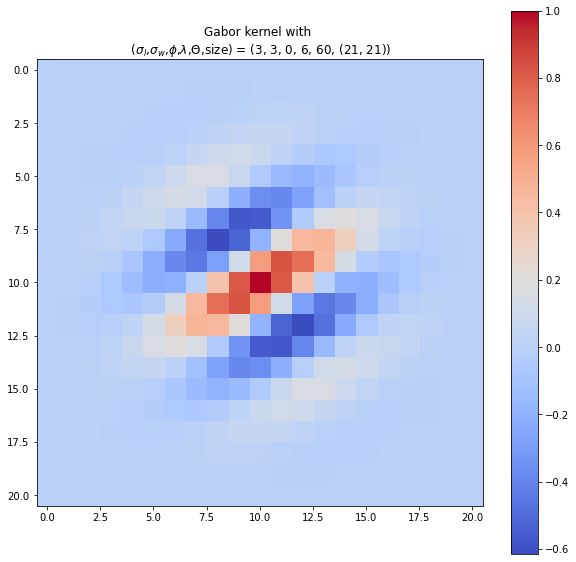

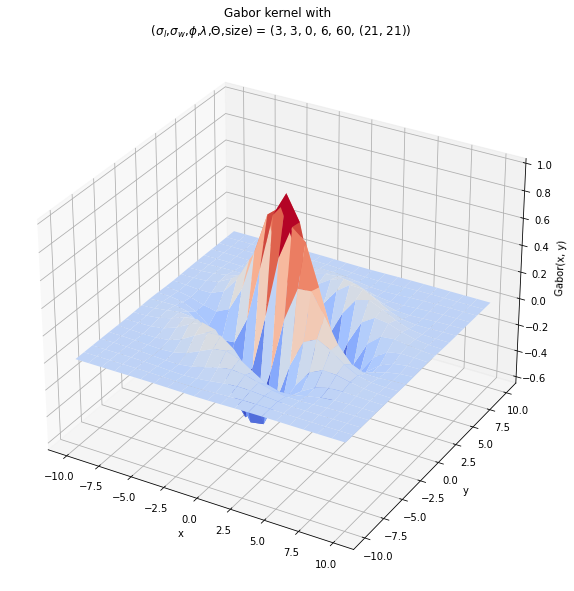

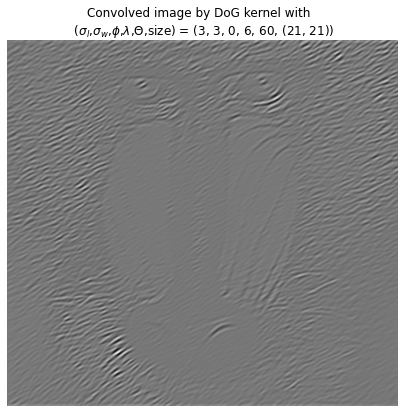

In [98]:
theta_60 = np.pi / 3

Gabor_60_kernel = Gabor_Receptive_Field(theta = theta_60,**kwargs_kernel)

plotFilter2D(Gabor_60_kernel,
title = f'Gabor kernel with \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,60,size}'

)

plotFilter3D(Gabor_60_kernel,f'Gabor kernel with \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,60,size}',kernel_name = 'Gabor',kwargs=kwargs)



Gabor_result_4 = Conv2D(image[:,:,0],Gabor_60_kernel)


plt.figure(figsize=(7,7))
plt.imshow(min_max_scaler(Gabor_result_4),cmap = 'gray')
plt.title(f'Convolved image by DoG kernel with  \n ($\sigma_l$,$\sigma_w$,$\phi$,$\lambda$,$\Theta$,size) = {std_l,std_w,phi,Lambda,60,size}')
plt.axis('off')
plt.show()



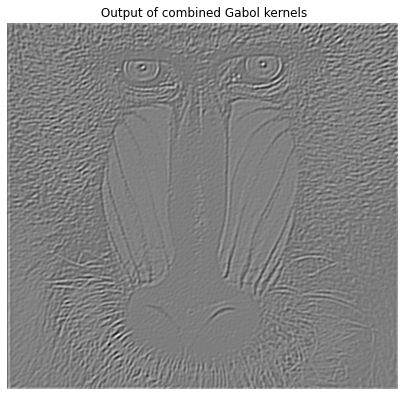

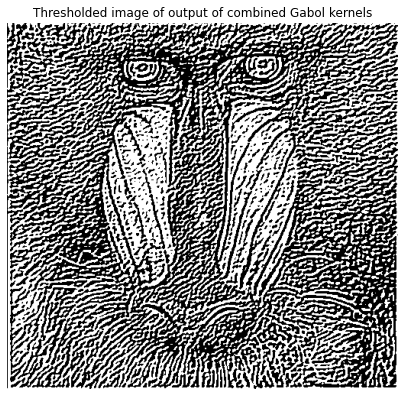

In [99]:
composite_gabor = Gabor_result_1 + Gabor_result_2 + Gabor_result_3 + Gabor_result_4
img = np.array(min_max_scaler(composite_gabor) * 255, dtype = np.uint8)



plt.figure(figsize=(7,7))
plt.imshow(composite_gabor,cmap = 'gray')
plt.title(' Output of combined Gabol kernels')
plt.axis('off')
plt.show()

plt.figure(figsize=(7,7))
plt.imshow(manuel_thresholding(img,127),cmap = 'gray')
plt.title('Thresholded image of output of combined Gabol kernels')
plt.axis('off')
plt.show()


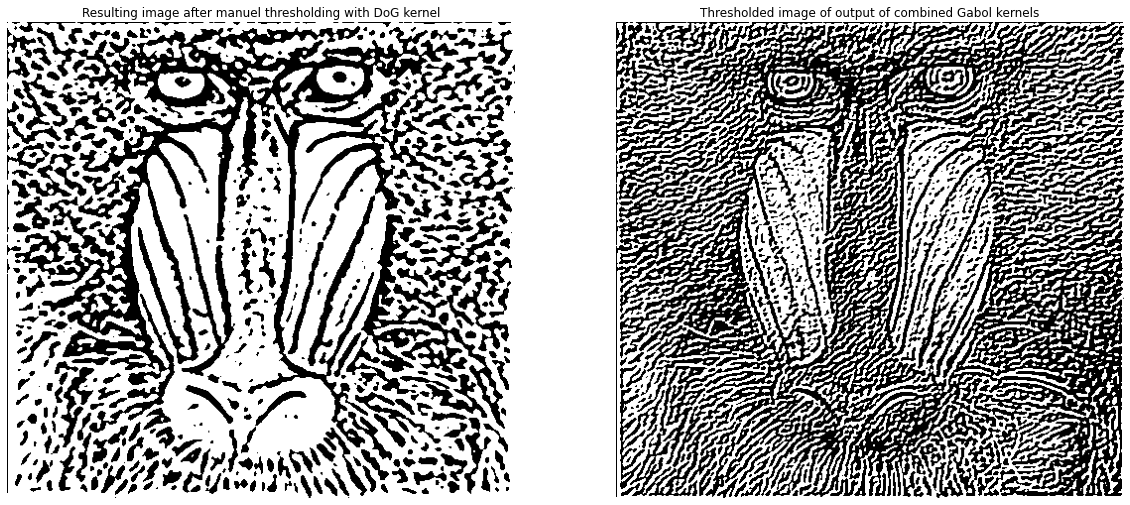

In [109]:
img = np.array(min_max_scaler(filtered_image) * 255, dtype = np.uint8)

fig,axs = plt.subplots(1,2,figsize = (20,40))
axs[0].imshow(manuel_thresholding(img,115),cmap = 'gray')
axs[0].set_title('Resulting image after manuel thresholding with DoG kernel')
axs[0].axis('off')


composite_gabor = Gabor_result_1 + Gabor_result_2 + Gabor_result_3 + Gabor_result_4
img = np.array(min_max_scaler(composite_gabor) * 255, dtype = np.uint8)

axs[1].imshow(manuel_thresholding(img,127),cmap = 'gray')
axs[1].set_title('Thresholded image of output of combined Gabol kernels')
axs[1].axis('off')
plt.show()
